In [1]:
from neural.containers import Sequential
from neural.layers import RELU, Softmax, Dense, TanH, Sigmoid
from neural.losses import CE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
EPOCHS = 100
LR = .01
BATCH_SIZE = 32

In [3]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# get class count
num_classes = len(np.unique(y_test))
num_pixels = 32 * 32 * 3

# Preprocess the dataset
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(len(X_test), -1).squeeze()
X_train = X_train.astype('float32') / 255.0
X_train = X_train.reshape(len(X_train), -1).squeeze()



y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [4]:
model = Sequential([
    Dense(num_pixels, 128),
    TanH(),
    Dense(128, 64),
    TanH(),
    Dense(64, num_classes),
    Softmax()
])


In [8]:
model.fit(X_train, y_train, EPOCHS, LR, CE(), 'categorical', BATCH_SIZE)

Epoch 0/100, Loss: 1.7851, Accuracy: 0.3889
Epoch 99/100, Loss: 0.4028, Accuracy: 0.8925


([1.7851113696325538,
  1.6501166482032306,
  1.5710282599486567,
  1.5077067489836238,
  1.455157424479845,
  1.4111908339575185,
  1.373835700865604,
  1.3412943657968288,
  1.312175032489662,
  1.2855067747236522,
  1.2606250616023804,
  1.2371096475608674,
  1.2147330870134807,
  1.1933566077743474,
  1.1728801986238884,
  1.153229965975974,
  1.1343587036266762,
  1.11623628045454,
  1.0988274302131058,
  1.0820865362205252,
  1.0659632430040709,
  1.0504066862517953,
  1.0353665784618051,
  1.0207938718338008,
  1.0066450379093794,
  0.9928862558921097,
  0.9794946825912874,
  0.9664526124080487,
  0.9537378338194054,
  0.9413277336974257,
  0.9292028147879072,
  0.917345206597556,
  0.9057384224195788,
  0.894367482593525,
  0.883218680977333,
  0.8722793761097776,
  0.8615379578753305,
  0.8509838717681004,
  0.8406075962101099,
  0.8304004909791406,
  0.8203544778834388,
  0.8104619201551374,
  0.8007160285645728,
  0.7911112494637755,
  0.7816431408607803,
  0.772307875972982

In [9]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


Accuracy: 0.4786
Confusion Matrix:
 [[549  33 142  18  55  14   6  51  73  59]
 [ 38 567  39  28  25  20  17  43  37 186]
 [ 62  20 476  55 154  57  43 105   6  22]
 [ 34  17 173 269 117 156  75 112  16  31]
 [ 37   6 189  41 498  40  46 110  14  19]
 [ 16   9 161 179  94 338  43 124   9  27]
 [ 13  19 155  86 152  53 444  47   8  23]
 [ 28  16  75  59  87  50  10 641   5  29]
 [130  84  59  25  35  24   1  52 513  77]
 [ 64 163  29  33  40  22  18 101  39 491]]


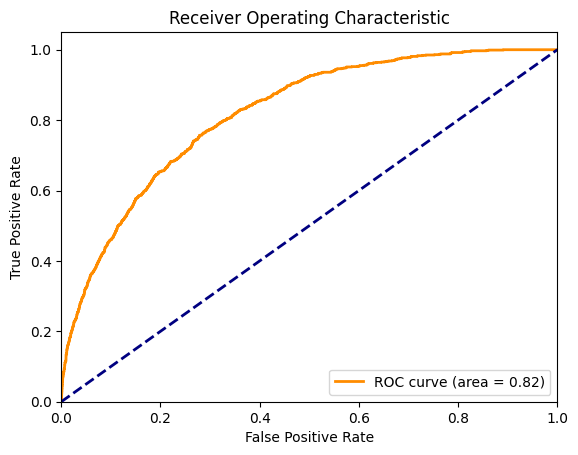

TypeError: Invalid shape (3072,) for image data

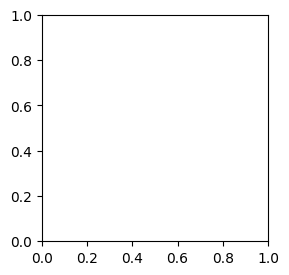

In [10]:

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
print("Confusion Matrix:\n", conf_mat)

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Display examples of correct and incorrect classifications
correct_indices = np.where(y_pred_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(y_pred_classes != np.argmax(y_test, axis=1))[0]

# Correctly classified images
plt.figure(figsize=(10,10))
for i, idx in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx])
    plt.title("Predicted: {}, Actual: {}".format(y_pred_classes[idx], np.argmax(y_test[idx])))
plt.show()

# Incorrectly classified images
plt.figure(figsize=(10,10))
for i, idx in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx])
    plt.title("Predicted: {}, Actual: {}".format(y_pred_classes[idx], np.argmax(y_test[idx])))
plt.show()